### Daftar Isi
* [1) Mengumpulkan Data](#h1)
* [2) Menelaah Data](#h2)
* [3) Memvalidasi Data](#h3)
* [4) Menetukan Object Data](#h4)
* [5) Membersihkan Data](#h5)
* [6) Mengkonstruksi Data](#h6)
* [7) Menentukan Label Data](#h7)
* [8) Membangun Model](#h8)
* [9) Mengevaluasi Hasil Pemodelan](#h9)
* [10) Optimasi Model Klasifikasi](#h10)

## 1) Mengumpulkan Data <a class="anchor" id="h1"></a>

### Fetal Health Classification
Cardiotocography (CTG) is used during pregnancy to monitor fetal heart rate and
uterine contractions. It is monitor fetal well-being and allows early detection of fetal
distress. CTG interpretation helps in determining if the pregnancy is high or low risk. An
abnormal CTG may indicate the need for further investigations and potential intervention.

On This Dataset Cardiotocograms (CTGs) are a simple and cost accessible option
to assess fetal health, allowing healthcare professionals to take action in order to prevent
child and maternal mortality. The equipment itself works by sending ultrasound pulses
and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements,
uterine contractions and more.

This dataset contains 2126 records of features extracted from Cardiotocogram
exams, which were then classified by expert obstetrician into 3 classes:

- Normal
- Suspect
- Pathological

Features :

1. 'baseline value’ FHR baseline (beats per minute)
2. ‘accelerations' Number of accelerations per second
3. 'fetal_movement' Number of fetal movements per second
4. ‘uterine_contractions' Number of uterine contractions per second
5. ‘light_decelerations' Number of light decelerations per second
6. 'severe_decelerations' Number of severe decelerations per second
7. ‘prolongued_decelerations' Number of prolonged decelerations per second
8. ‘abnormal_short_term_variability' Percentage of time with abnormal short term variability
9. 'mean_value_of_short_term_variability' Mean value of short term variability
10. 'percentage_of_time_with_abnormal_long_term_variability' Percentage of time with abnormal long term variability
11. 'mean_value_of_long_term_variability' Mean value of long term variability
12. 'histogram_width' Width of FHR histogram
13. 'histogram_min' Minimum (low frequency) of FHR histogram
14. 'histogram_max' Maximum (high frequency) of FHR histogram
15. 'histogram_number_of_peaks' Number of histogram peaks
16. 'histogram_number_of_zeroes' Number of histogram zeros
17. 'histogram_mode' Histogram mode
18. 'histogram_mean' Histogram mean
19. 'histogram_median' Histogram median
20. 'histogram_variance' Histogram variance
21. "histogram_tendency' Histogram tendency

Target :
1. 'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BK-DS/01_Fetal_Health/dataset/fetal_health.csv')

In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,NaN,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## 2) Menelaah Data <a class="anchor" id="h2"></a>

In [ ]:
# getting data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    1914 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                1914 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.shape

(2126, 22)

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,1914.000000,2126.000000,2126.000000,1914.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,1914.000000,2126.000000,2126.000000,1914.000000,1914.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004372,0.001889,0.000003,0.000158,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.477011,134.610536,138.090310,19.020899,0.319749,1.304327
std,9.840844,0.003866,0.046666,0.002953,0.002960,0.000057,0.000592,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.434563,15.593596,14.466589,29.628676,0.610208,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


<ipython-input-8-316712ca6cd9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=fetal_health_counts.index, y=fetal_health_counts.values, palette='rocket')


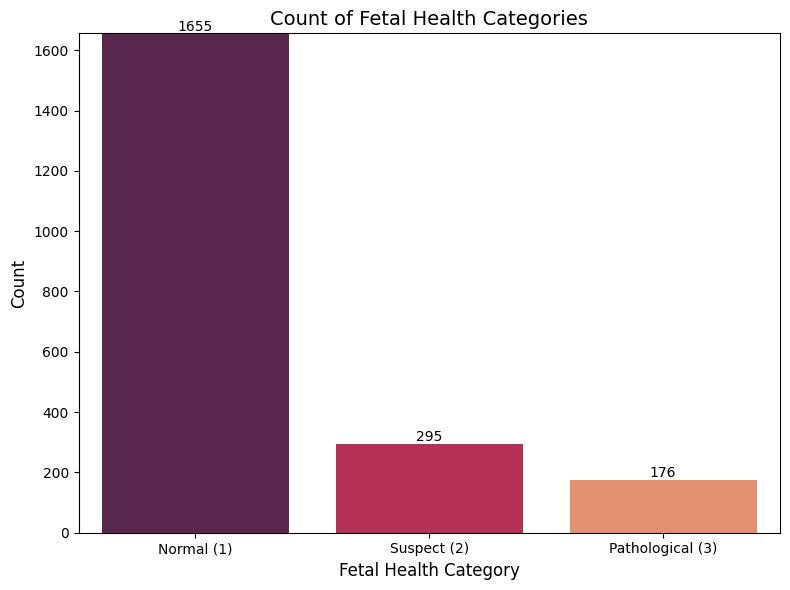

In [ ]:
# Visualisasi Jumlah Kategori Fetal Health
fetal_health_counts = df['fetal_health'].value_counts()
fetal_health_counts.index = ['Normal (1)', 'Suspect (2)', 'Pathological (3)']

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=fetal_health_counts.index, y=fetal_health_counts.values, palette='rocket')

for i, count in enumerate(fetal_health_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Count of Fetal Health Categories', fontsize=14)
plt.xlabel('Fetal Health Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, max(fetal_health_counts.values) + 1)

plt.tight_layout()
plt.show()

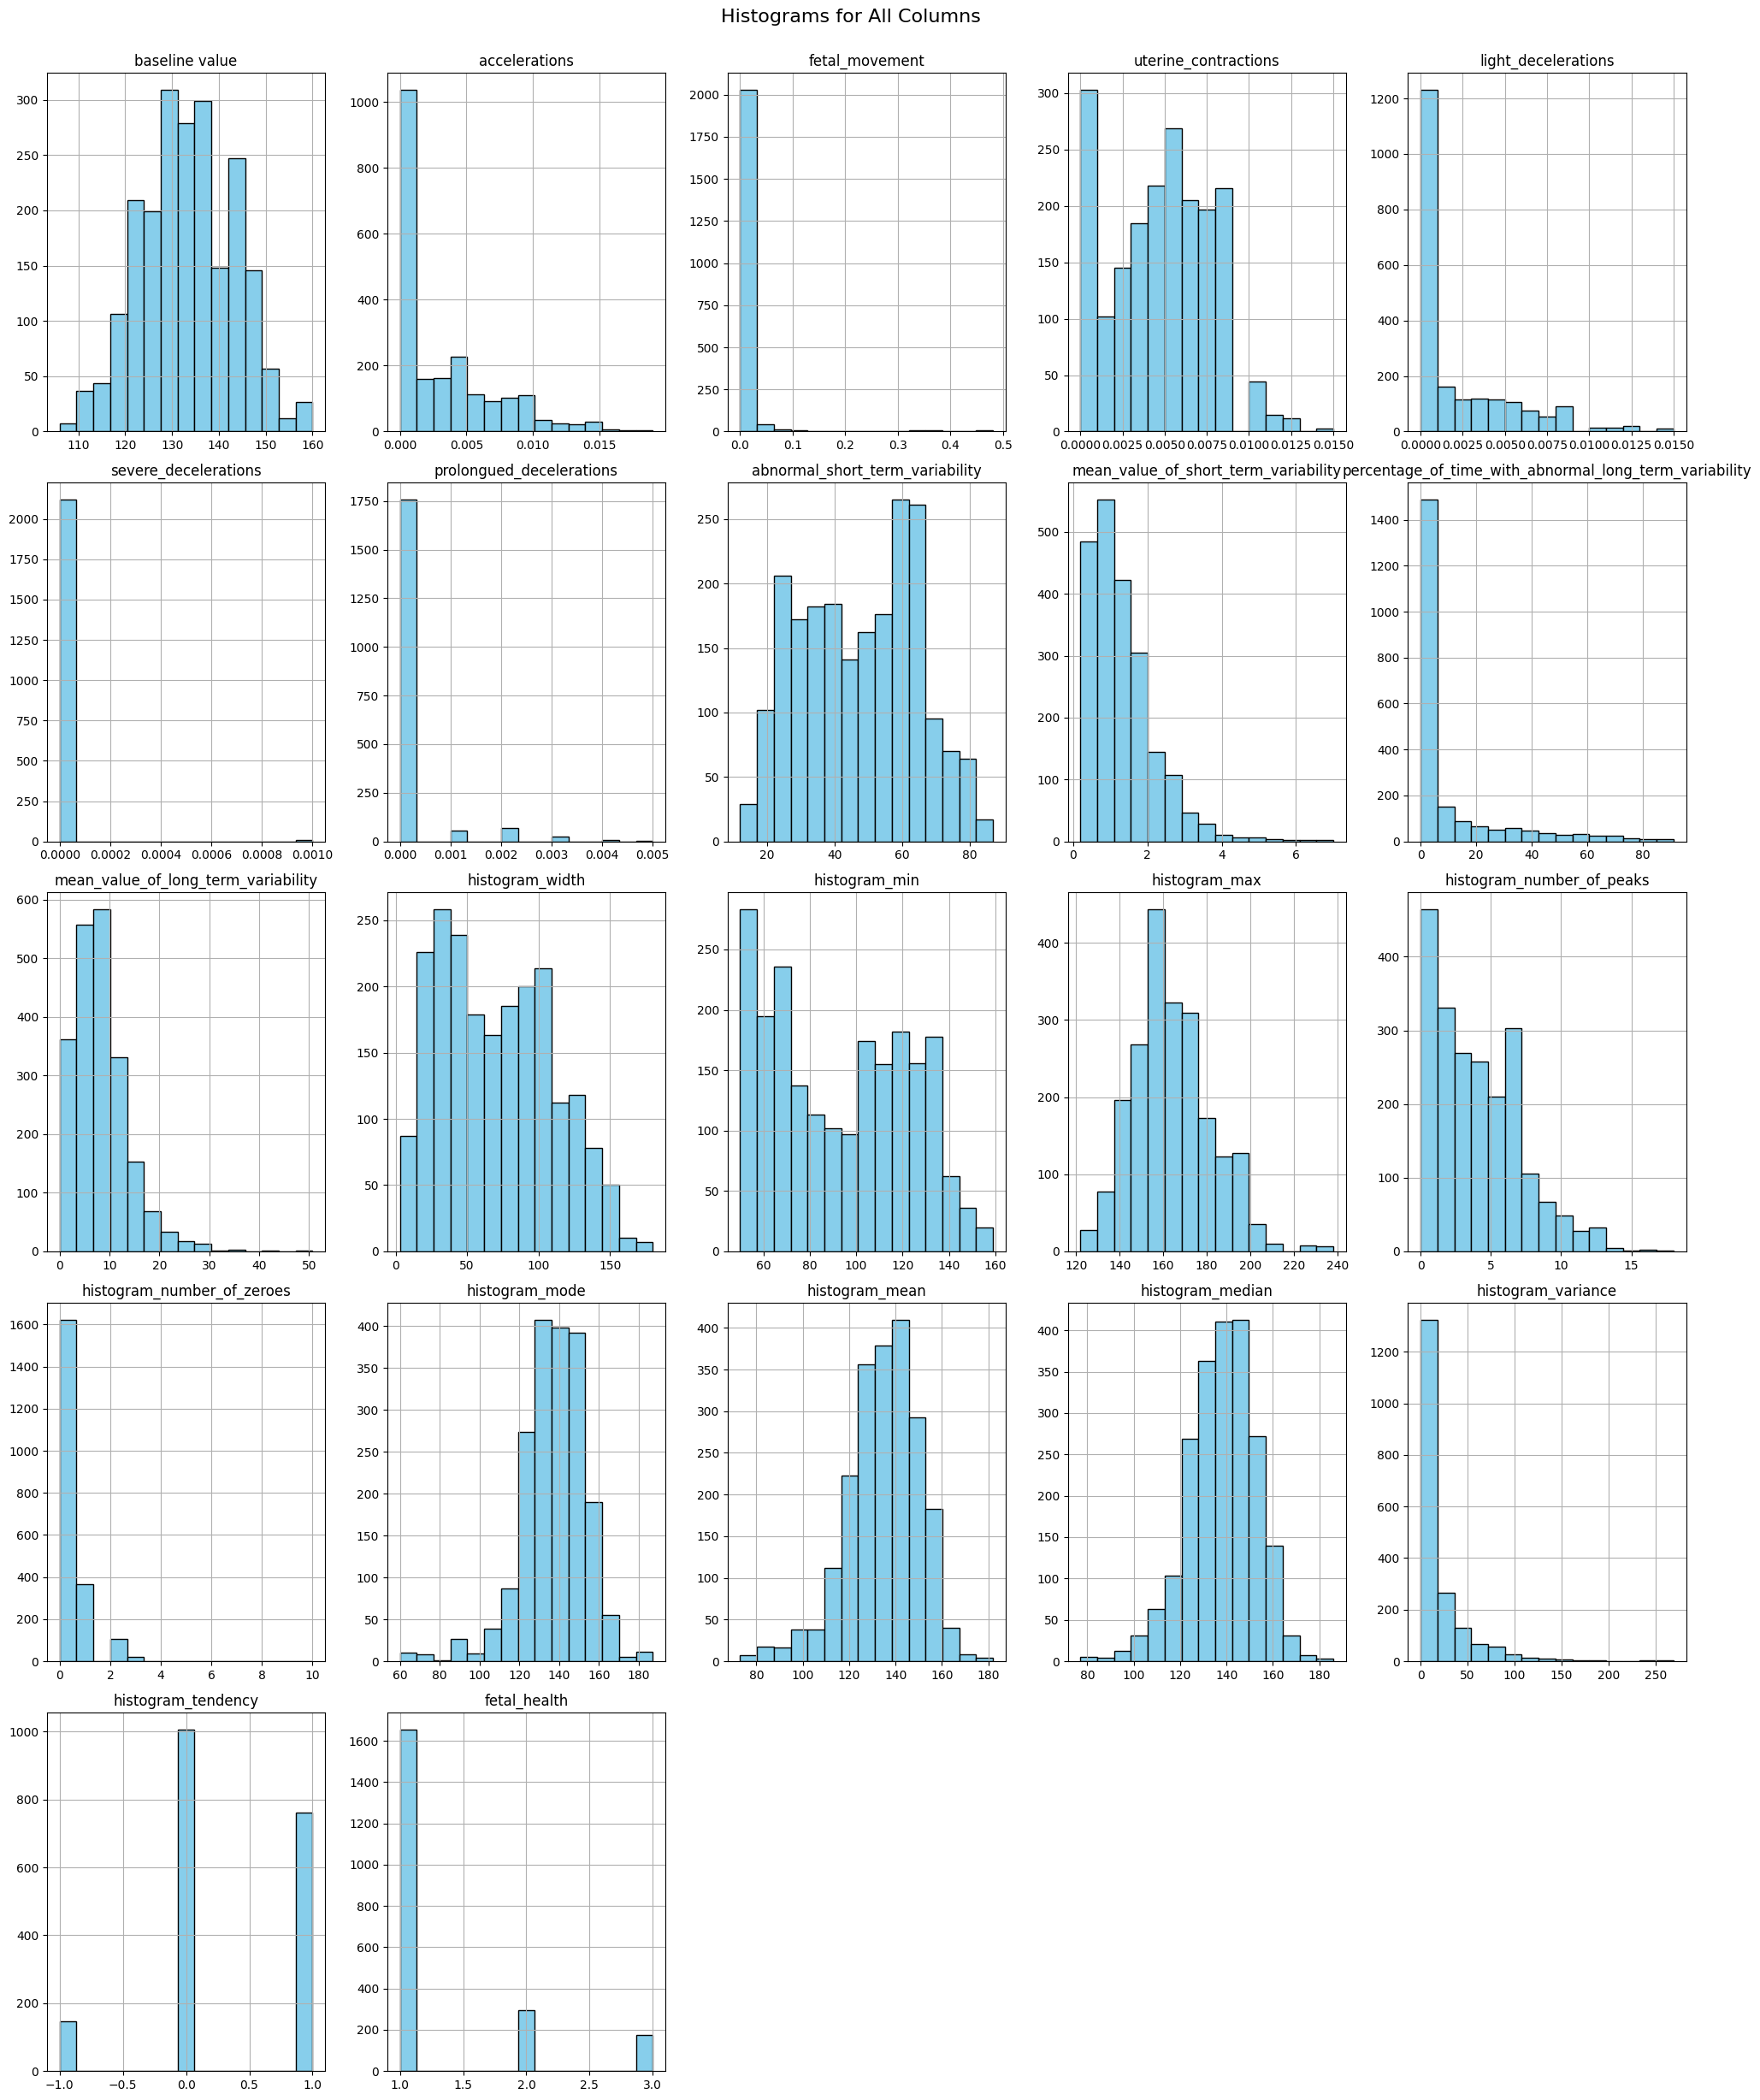

In [ ]:
# Histogram masing-masing kolom
df.hist(figsize=(20, 25), bins=15, color='skyblue', edgecolor='black')

plt.suptitle('Histograms for All Columns', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)

plt.show()


## 3) Memvalidasi Data <a class="anchor" id="h3"></a>

In [ ]:
# Menghitung nilai Null pada dataset
df.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,212
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,212
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


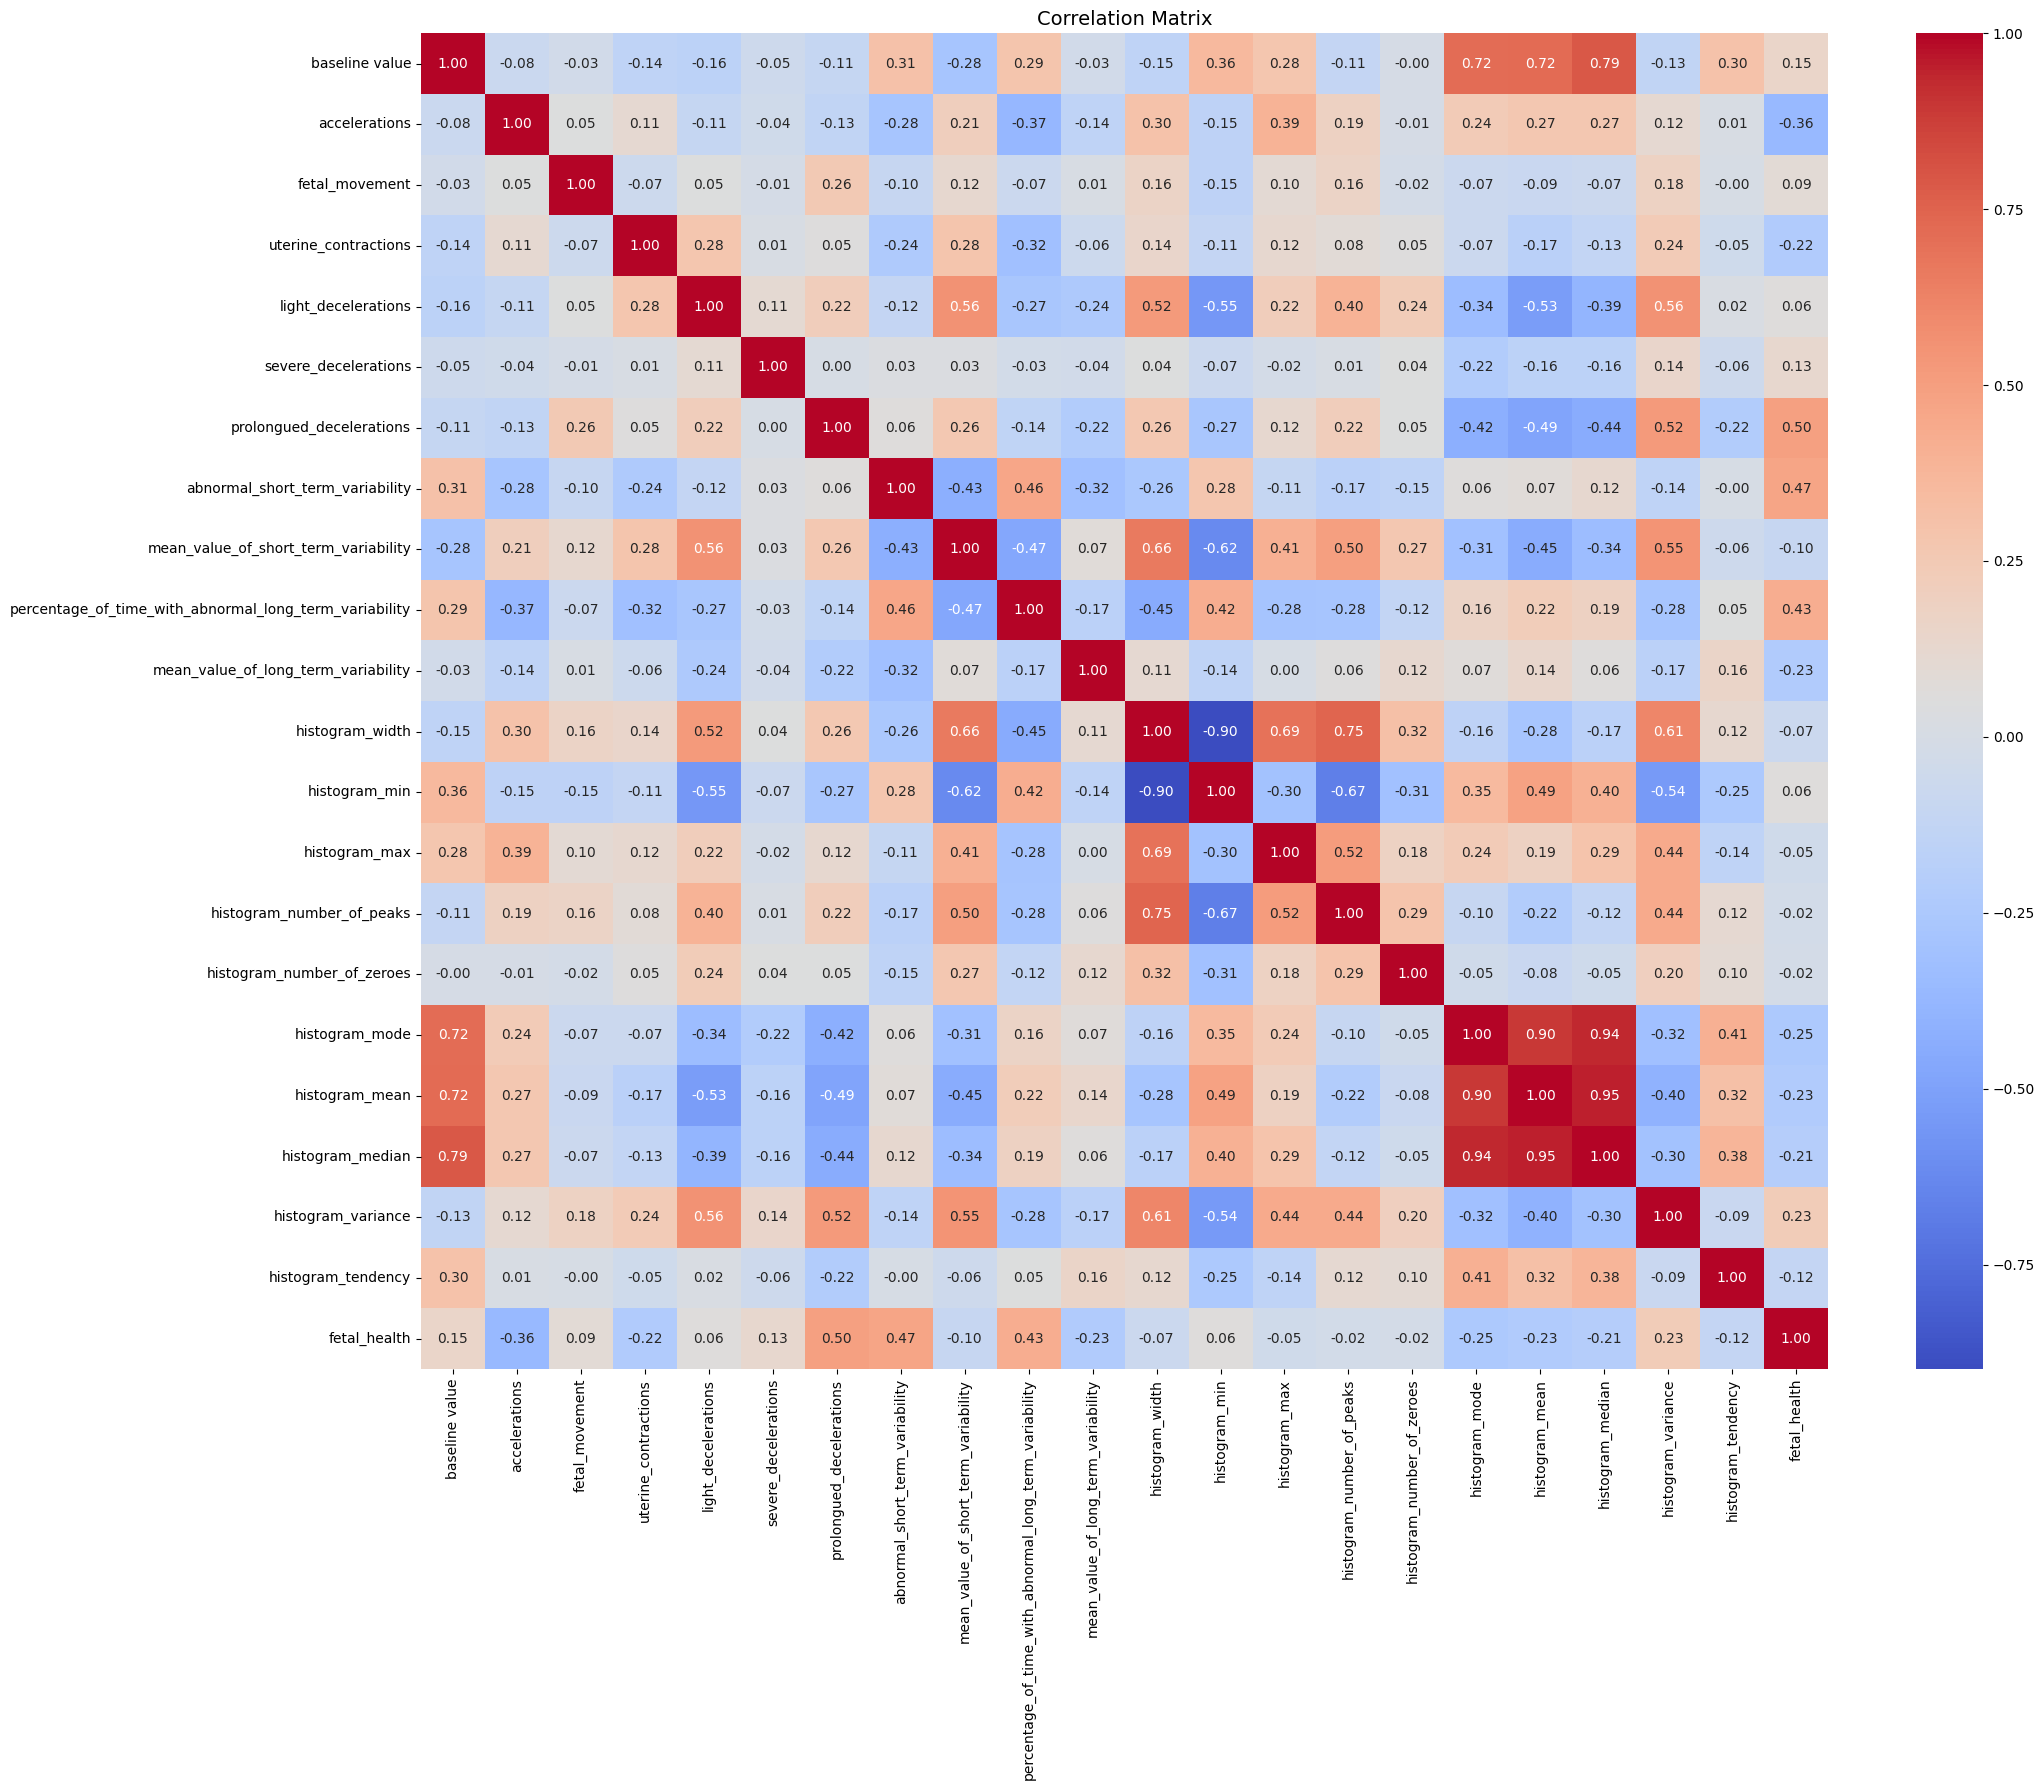

In [ ]:
# Menampilkan Korelasi antar Fitur
correlation_matrix = df.corr()

plt.figure(figsize=(22, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

plt.title('Correlation Matrix', fontsize=14)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

**Korelasi Positif yang Kuat (>0,7):**
Korelasi Positif yang Kuat (>0,7)
* Fitur-fitur yang berhubungan dengan histogram menunjukkan korelasi yang sangat kuat di antara mereka sendiri:
* histogram_mode, histogram_mean, dan histogram_median berkorelasi sangat tinggi (0,90-0,95)
* Metrik-metrik ini juga berkorelasi kuat dengan baseline_value (0,72-0,79)
Hal ini menunjukkan potensi redundansi dalam fitur histogram


**Korelasi Sedang hingga Kuat dengan Kesehatan Janin:**
* prolongued_decelerations (0,50)
* abnormal_short_term_variability (0,47)
* percentage_of_time_with_abnormal_long_term_variabilit (0,43)
Ini berkorelasi positif dengan hasil kesehatan janin yang lebih buruk

**Korelasi Lemah:**
* fetal_movement menunjukkan korelasi yang relatif lemah dengan sebagian besar fitur
* severe_decelerations menunjukkan korelasi yang sangat rendah dengan fitur lainnya
* histogram_number_of_zeroes memiliki korelasi yang lemah secara keseluruhan

**Korelasi Negatif yang Penting:**
* accelerations (-0,36) dengan kesehatan janin
* Hal ini masuk akal secara klinis karena akselerasi yang lebih banyak biasanya menunjukkan kesehatan janin yang lebih baik
* histogram_min menunjukkan korelasi negatif dengan beberapa fitur
* nilai mean_value_of_short_term_variability memiliki korelasi negatif dengan ukuran variabilitas abnormal

**Implikasi Pemilihan Fitur:**
* Kita dapat menghapus beberapa fitur histogram yang berkorelasi tinggi
* Sebaiknya pertahankan fitur deselerasi dan variabilitas karena menunjukkan korelasi yang bermakna dengan kesehatan janin
* baseline_value dan fitur-fitur yang berkorelasi dapat dikonsolidasikan

**Berdasarkan matriks korelasi, akan menghapus fitur-fitur berikut ini:**
* histogram_median, histogram_mode, severe_decelerations, histogram_number_of_zeroes, fetal_movement

## 4) Menentukan Objek Data <a class="anchor" id="h4"></a>

In [ ]:
# Menghapus fitur yang tidak dapat digunakan
df.drop(['histogram_median', 'histogram_mode', 'severe_decelerations', 'histogram_number_of_zeroes', 'fetal_movement'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 17 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   uterine_contractions                                    1914 non-null   float64
 3   light_decelerations                                     2126 non-null   float64
 4   prolongued_decelerations                                1914 non-null   float64
 5   abnormal_short_term_variability                         2126 non-null   float64
 6   mean_value_of_short_term_variability                    2126 non-null   float64
 7   percentage_of_time_with_abnormal_long_term_variability  2126 non-null   float64
 8   mean_value_of_long_term_variability   


ANOVA Test Results:

Top 5 Most Significant Features:
                                                    f_statistic  \
percentage_of_time_with_abnormal_long_term_vari...   345.156385   
abnormal_short_term_variability                      343.820419   
histogram_mean                                       297.625497   
accelerations                                        196.027523   
baseline value                                       140.621076   

                                                          p_value  significant  
percentage_of_time_with_abnormal_long_term_vari...  1.631148e-130         True  
abnormal_short_term_variability                     4.472368e-130         True  
histogram_mean                                      1.145660e-114         True  
accelerations                                        7.520612e-79         True  
baseline value                                       4.457098e-58         True  

Least Significant Features:
                          f

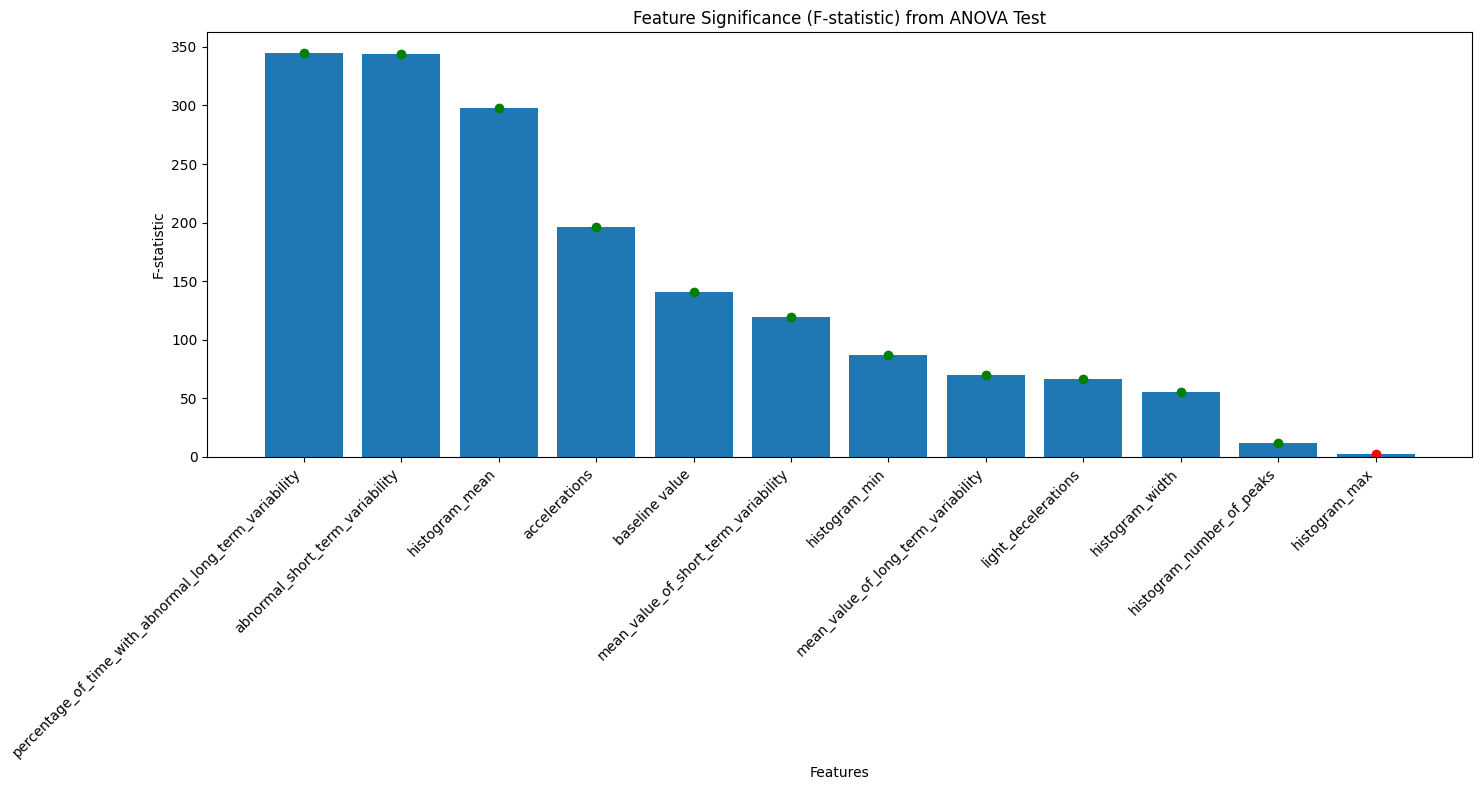


Percentage of statistically significant features: 68.75%


In [ ]:
# ANOVA Test
def perform_anova_analysis(df):

    anova_results = {}

    for feature in df.columns[:-1]:
        classes = [
            group[feature].values
            for name, group in df.groupby('fetal_health')
        ]

        f_statistic, p_value = stats.f_oneway(*classes)

        anova_results[feature] = {
            'f_statistic': f_statistic,
            'p_value': p_value
        }

    results_df = pd.DataFrame(anova_results).T
    results_df['significant'] = results_df['p_value'] < 0.05

    results_df = results_df.sort_values('f_statistic', ascending=False)

    return results_df

def plot_anova_results(results_df):

    plt.figure(figsize=(15, 8))
    plt.bar(range(len(results_df)), results_df['f_statistic'])
    plt.xticks(range(len(results_df)), results_df.index, rotation=45, ha='right')
    plt.title('Feature Significance (F-statistic) from ANOVA Test')
    plt.xlabel('Features')
    plt.ylabel('F-statistic')

    for i, significant in enumerate(results_df['significant']):
        color = 'green' if significant else 'red'
        plt.plot(i, results_df['f_statistic'].iloc[i], 'o', color=color)

    plt.tight_layout()

    return plt

results = perform_anova_analysis(df)

print("\nANOVA Test Results:")
print("\nTop 5 Most Significant Features:")
print(results.head())
print("\nLeast Significant Features:")
print(results.tail())

plot_anova_results(results)
plt.show()

significant_features = results['significant'].sum()
total_features = len(results)
print(f"\nPercentage of statistically significant features: {(significant_features/total_features)*100:.2f}%")

In [ ]:
df.drop(columns=['histogram_max'], axis = 1, inplace = True)


In [ ]:
df

,baseline value,accelerations,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_number_of_peaks,histogram_mean,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.0,73.0,0.5,43.0,2.4,64.0,62.0,2.0,137.0,73.0,1.0,2.0
1,132.0,0.006,0.006,0.003,0.0,17.0,2.1,0.0,10.4,130.0,68.0,6.0,136.0,12.0,0.0,1.0
2,133.0,0.003,0.008,0.003,0.0,16.0,2.1,0.0,13.4,130.0,68.0,5.0,135.0,13.0,0.0,1.0
3,134.0,0.003,0.008,0.003,0.0,16.0,2.4,0.0,23.0,117.0,53.0,11.0,134.0,13.0,1.0,1.0
4,132.0,0.007,0.008,0.000,0.0,16.0,2.4,0.0,19.9,117.0,53.0,9.0,136.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.007,0.000,0.0,79.0,0.2,25.0,7.2,40.0,137.0,4.0,150.0,2.0,0.0,2.0
2122,140.0,0.001,0.007,0.000,0.0,78.0,0.4,22.0,7.1,66.0,103.0,6.0,148.0,3.0,1.0,2.0
2123,140.0,0.001,0.007,0.000,0.0,79.0,0.4,20.0,6.1,67.0,103.0,5.0,148.0,4.0,1.0,2.0
2124,140.0,0.001,0.006,0.000,0.0,78.0,0.4,27.0,7.0,66.0,103.0,6.0,147.0,4.0,1.0,2.0


## 5) Membersihkan Data <a class="anchor" id="h5"></a>

In [ ]:
df.isnull().sum()

,0
baseline value,0
accelerations,0
uterine_contractions,212
light_decelerations,0
prolongued_decelerations,212
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0
mean_value_of_long_term_variability,0
histogram_width,0


In [ ]:
# Mendeteksi keberadaan nilai Null
df.loc[:, df.isnull().any()].columns

Index(['uterine_contractions', 'prolongued_decelerations',
       'histogram_variance', 'histogram_tendency'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   uterine_contractions                                    1914 non-null   float64
 3   light_decelerations                                     2126 non-null   float64
 4   prolongued_decelerations                                1914 non-null   float64
 5   abnormal_short_term_variability                         2126 non-null   float64
 6   mean_value_of_short_term_variability                    2126 non-null   float64
 7   percentage_of_time_with_abnormal_long_term_variability  2126 non-null   float64
 8   mean_value_of_long_term_variability   

In [ ]:
import missingno

<Axes: >

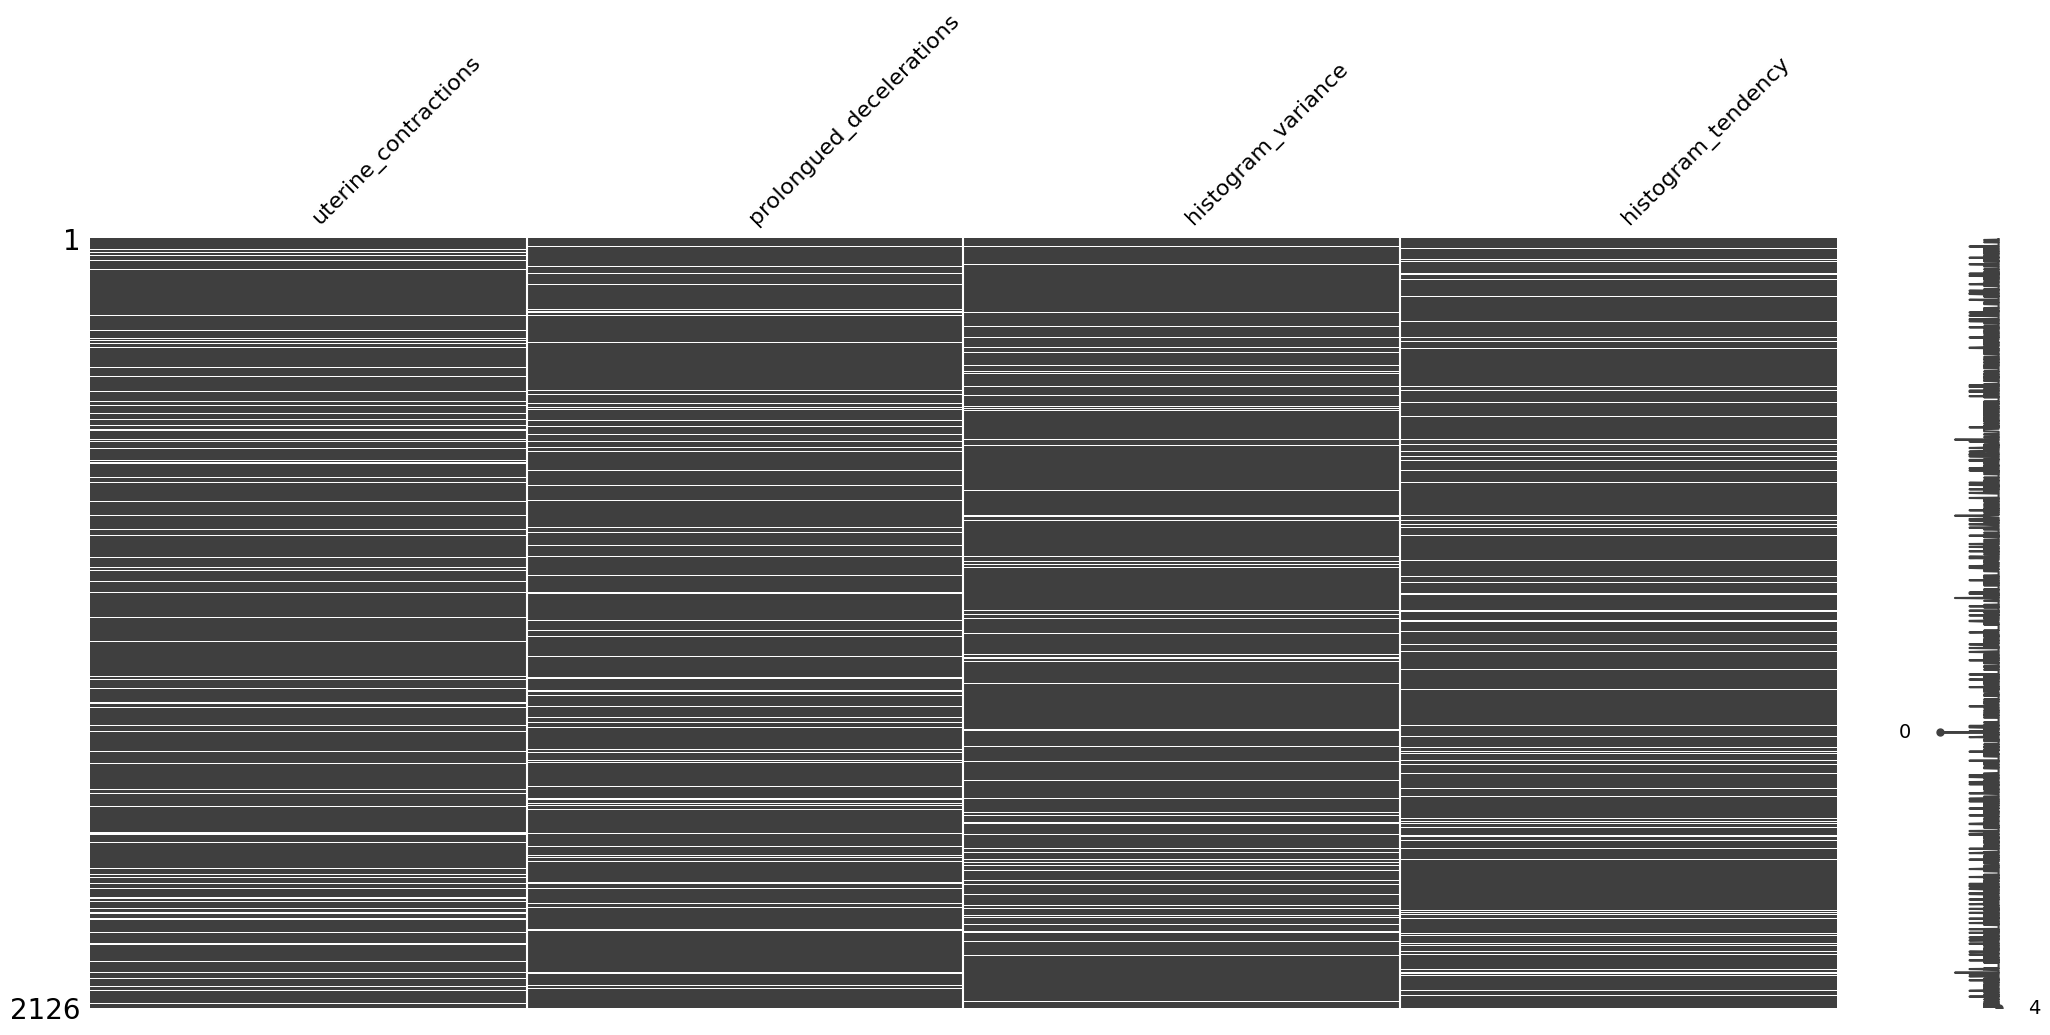

In [ ]:
# Memvisualisasikan keberadaan nilai Null
missingdata_df = df.columns[df.isnull().any()].tolist()
missingno.matrix(df[missingdata_df])

In [ ]:
# Daftar kolom yang ingin dihitung persentase Null-nya
columns_to_check = ['uterine_contractions', 'prolongued_decelerations',
                    'histogram_variance', 'histogram_tendency']

# Hitung persentase Null hanya untuk kolom tersebut
null_percentage_selected = (df[columns_to_check].isnull().sum() / len(df)) * 100

# Cetak hasil
print(null_percentage_selected)

uterine_contractions        9.971778
prolongued_decelerations    9.971778
histogram_variance          9.971778
histogram_tendency          9.971778
dtype: float64


In [ ]:
# Daftar kolom yang akan diisi nilai Null-nya dengan median
columns_to_fill = ['uterine_contractions', 'prolongued_decelerations',
                   'histogram_variance', 'histogram_tendency']

# Mengisi nilai Null dengan median masing-masing kolom
for col in columns_to_fill:
    median_value = df[col].median()  # Hitung median kolom
    df[col] = df[col].fillna(median_value)  # Isi Null dengan median

print(df)

      baseline value  accelerations  uterine_contractions  \
0              120.0          0.000                 0.000   
1              132.0          0.006                 0.006   
2              133.0          0.003                 0.008   
3              134.0          0.003                 0.008   
4              132.0          0.007                 0.008   
...              ...            ...                   ...   
2121           140.0          0.000                 0.007   
2122           140.0          0.001                 0.007   
2123           140.0          0.001                 0.007   
2124           140.0          0.001                 0.006   
2125           142.0          0.002                 0.008   

      light_decelerations  prolongued_decelerations  \
0                   0.000                       0.0   
1                   0.003                       0.0   
2                   0.003                       0.0   
3                   0.003                      

In [ ]:
df.isnull().sum()

,0
baseline value,0
accelerations,0
uterine_contractions,0
light_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0
mean_value_of_long_term_variability,0
histogram_width,0


In [ ]:
# Menampilkan data duplikat
duplicate_rows = df.duplicated()
print("All Duplicate Rows:")
df[df.duplicated(keep=False)]

All Duplicate Rows:


,baseline value,accelerations,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_number_of_peaks,histogram_mean,histogram_variance,histogram_tendency,fetal_health
67,140.0,0.007,0.004,0.0,0.0,34.0,1.2,0.0,10.3,60.0,119.0,2.0,153.0,5.0,0.0,1.0
68,140.0,0.007,0.004,0.0,0.0,34.0,1.2,0.0,10.3,60.0,119.0,2.0,153.0,5.0,0.0,1.0
233,123.0,0.000,0.000,0.0,0.0,49.0,0.8,7.0,13.8,74.0,63.0,2.0,127.0,2.0,1.0,1.0
234,123.0,0.000,0.000,0.0,0.0,49.0,0.8,7.0,13.8,74.0,63.0,2.0,127.0,2.0,1.0,1.0
304,145.0,0.000,0.000,0.0,0.0,77.0,0.2,45.0,5.8,21.0,129.0,1.0,145.0,0.0,1.0,2.0
306,145.0,0.000,0.000,0.0,0.0,77.0,0.2,45.0,5.8,21.0,129.0,1.0,145.0,0.0,1.0,2.0
317,150.0,0.000,0.000,0.0,0.0,79.0,0.2,84.0,2.8,5.0,147.0,1.0,149.0,0.0,0.0,3.0
319,150.0,0.000,0.000,0.0,0.0,79.0,0.2,84.0,2.8,5.0,147.0,1.0,149.0,0.0,0.0,3.0
323,135.0,0.000,0.000,0.0,0.0,62.0,0.5,71.0,6.9,97.0,71.0,3.0,142.0,1.0,1.0,3.0
324,135.0,0.000,0.000,0.0,0.0,62.0,0.5,71.0,6.9,97.0,71.0,3.0,142.0,1.0,1.0,3.0


In [ ]:
# Menghapus data duplikat, menyimpan data dalam variabel dfClean
dfClean = df.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,baseline value,accelerations,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_number_of_peaks,histogram_mean,histogram_variance,histogram_tendency,fetal_health


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   uterine_contractions                                    2126 non-null   float64
 3   light_decelerations                                     2126 non-null   float64
 4   prolongued_decelerations                                2126 non-null   float64
 5   abnormal_short_term_variability                         2126 non-null   float64
 6   mean_value_of_short_term_variability                    2126 non-null   float64
 7   percentage_of_time_with_abnormal_long_term_variability  2126 non-null   float64
 8   mean_value_of_long_term_variability   

In [ ]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2116 entries, 0 to 2125
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2116 non-null   float64
 1   accelerations                                           2116 non-null   float64
 2   uterine_contractions                                    2116 non-null   float64
 3   light_decelerations                                     2116 non-null   float64
 4   prolongued_decelerations                                2116 non-null   float64
 5   abnormal_short_term_variability                         2116 non-null   float64
 6   mean_value_of_short_term_variability                    2116 non-null   float64
 7   percentage_of_time_with_abnormal_long_term_variability  2116 non-null   float64
 8   mean_value_of_long_term_variability        

## 6) Menkonstruksi Data <a class="anchor" id="h2"></a>

<ipython-input-29-b9934d42ca54>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=fetal_health_counts.index, y=fetal_health_counts.values, palette='rocket')


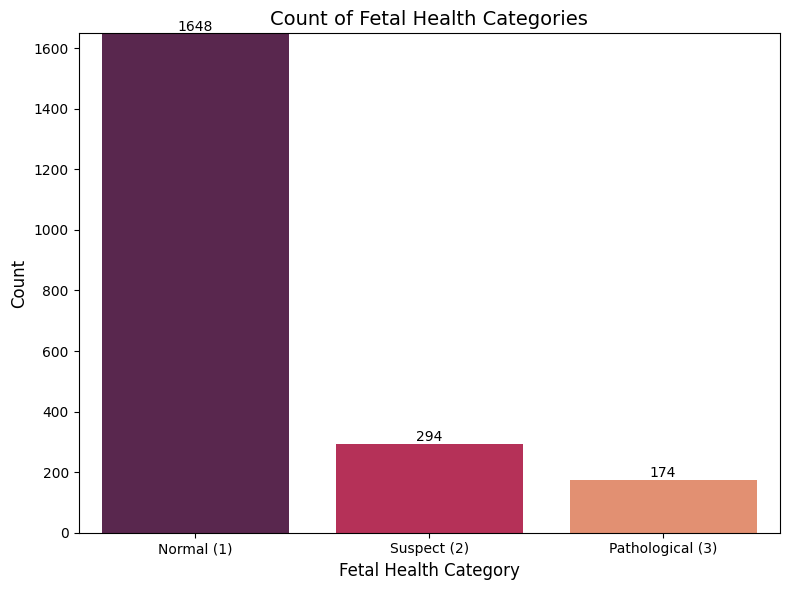

In [ ]:
fetal_health_counts = dfClean['fetal_health'].value_counts()
fetal_health_counts.index = ['Normal (1)', 'Suspect (2)', 'Pathological (3)']

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=fetal_health_counts.index, y=fetal_health_counts.values, palette='rocket')

for i, count in enumerate(fetal_health_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Count of Fetal Health Categories', fontsize=14)
plt.xlabel('Fetal Health Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, max(fetal_health_counts.values) + 1)

plt.tight_layout()
plt.show()

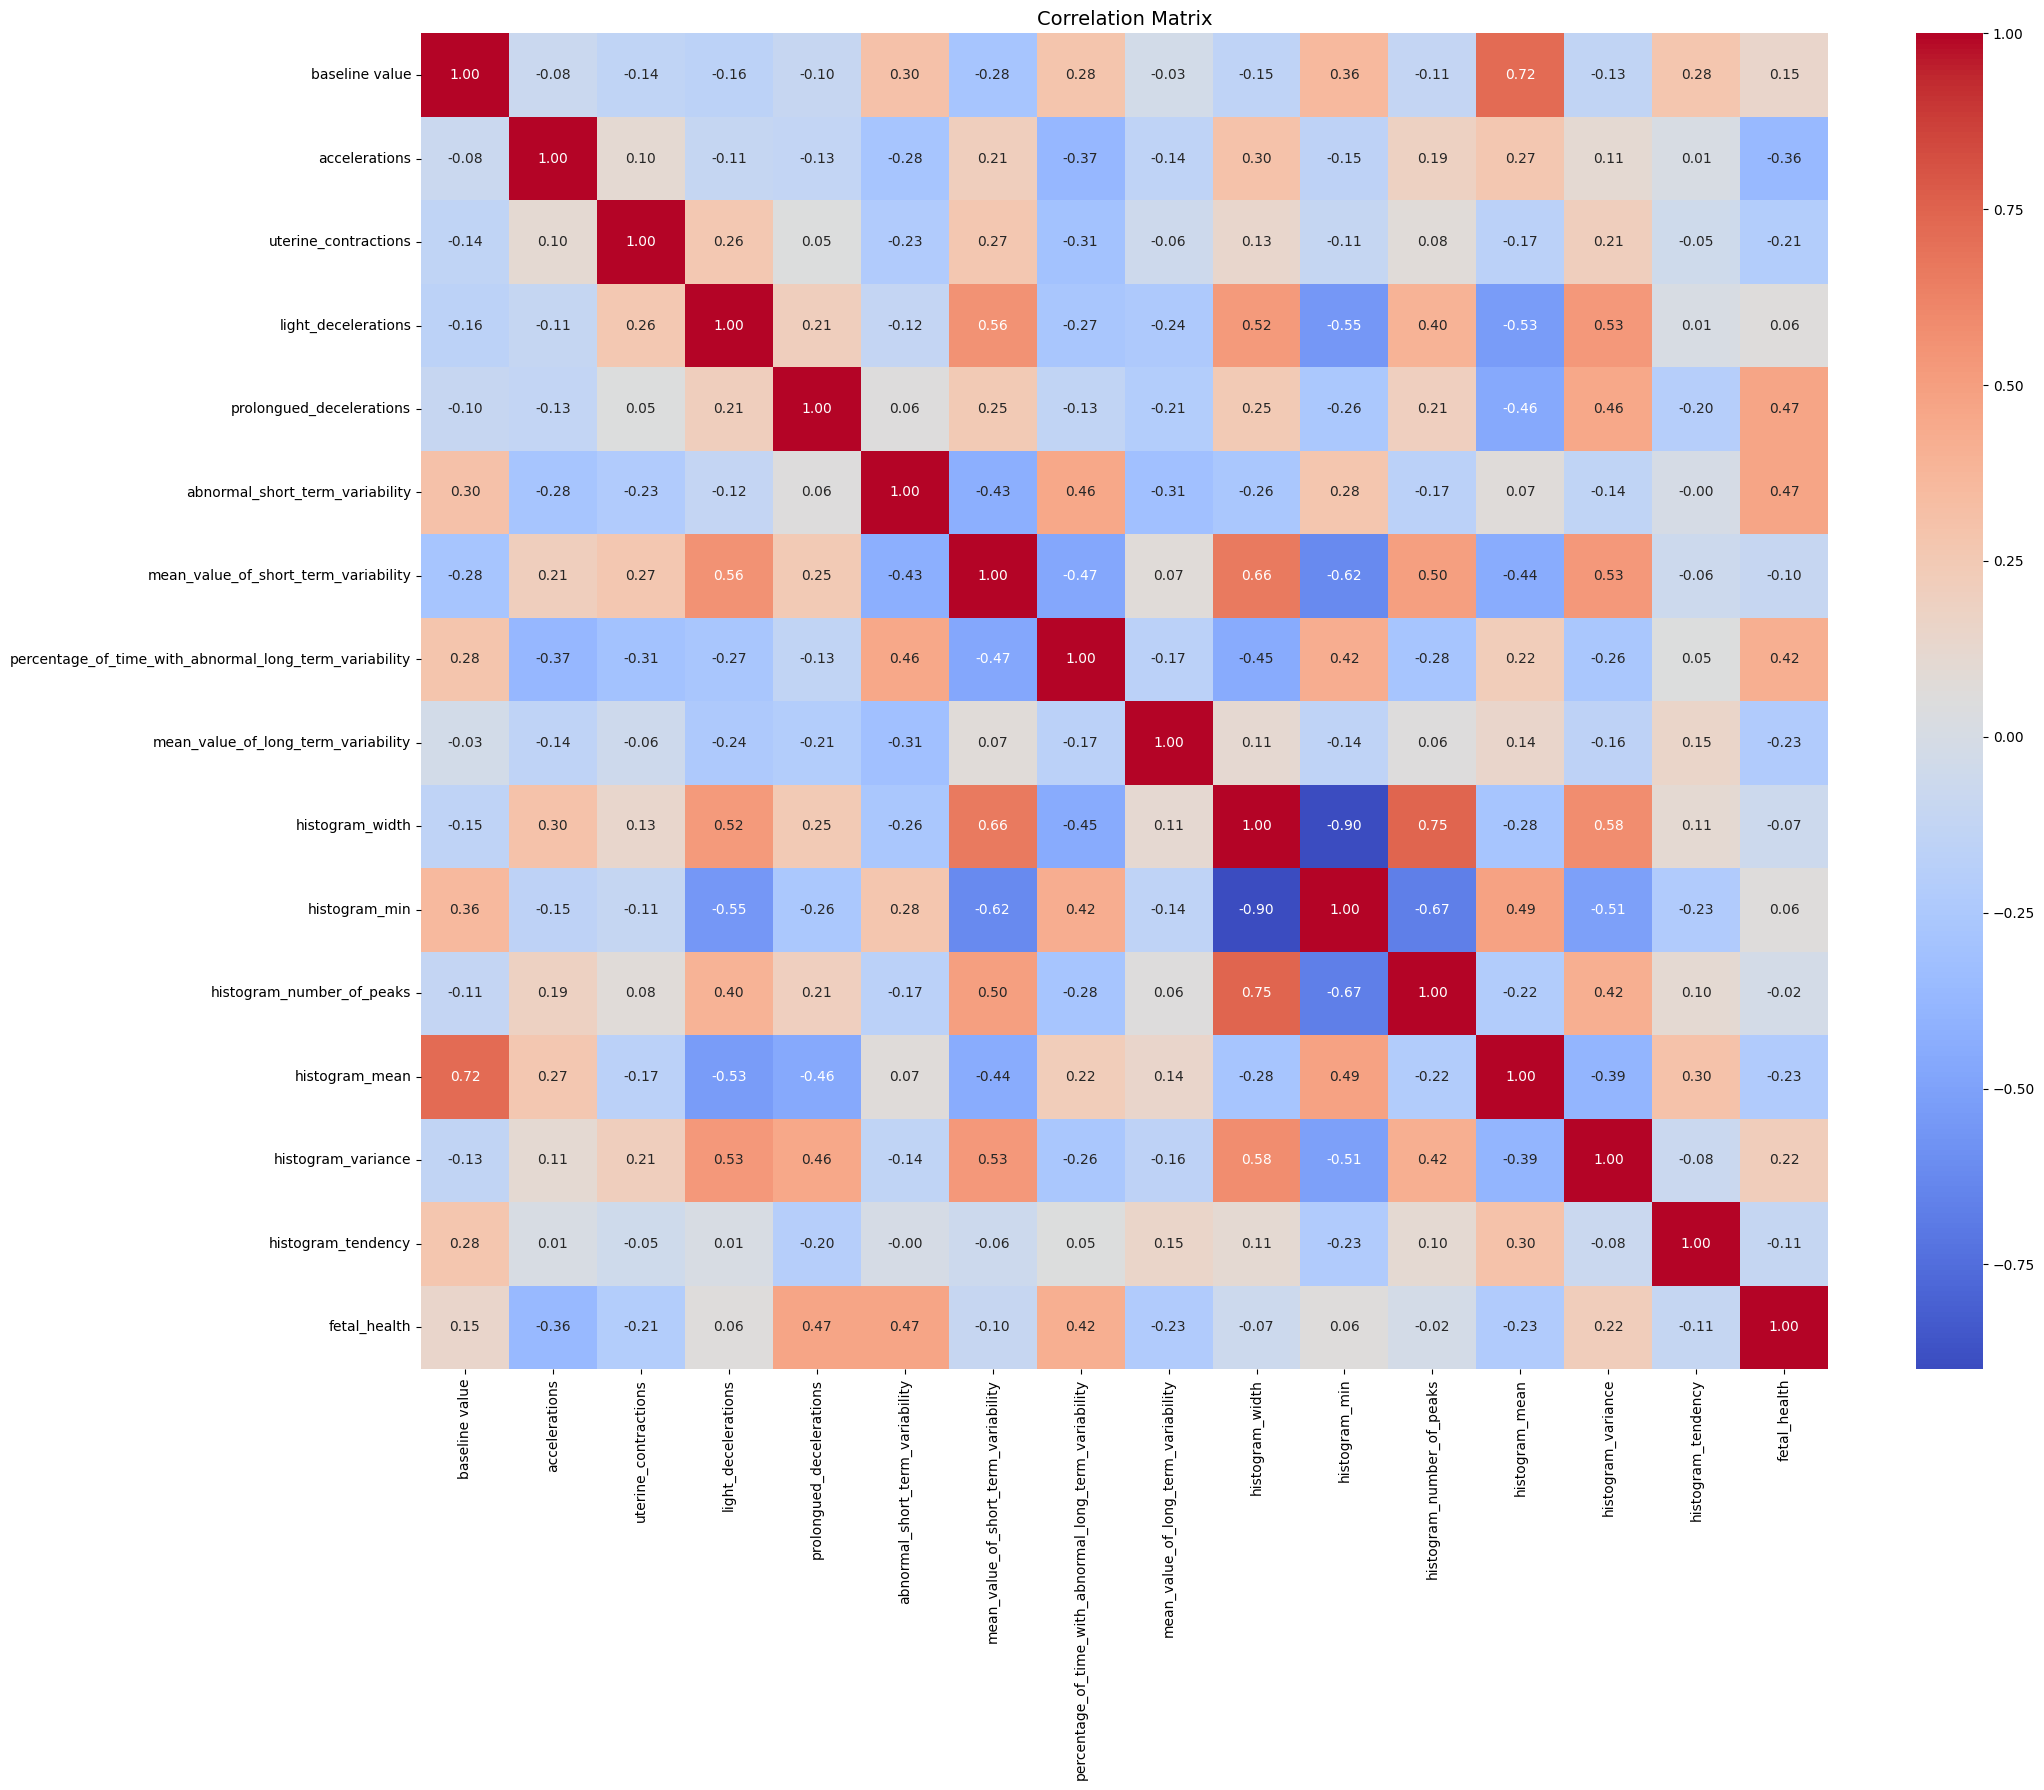

In [ ]:
correlation_matrix_clean = dfClean.corr()

plt.figure(figsize=(22, 18))
sns.heatmap(correlation_matrix_clean, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

plt.title('Correlation Matrix', fontsize=14)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()



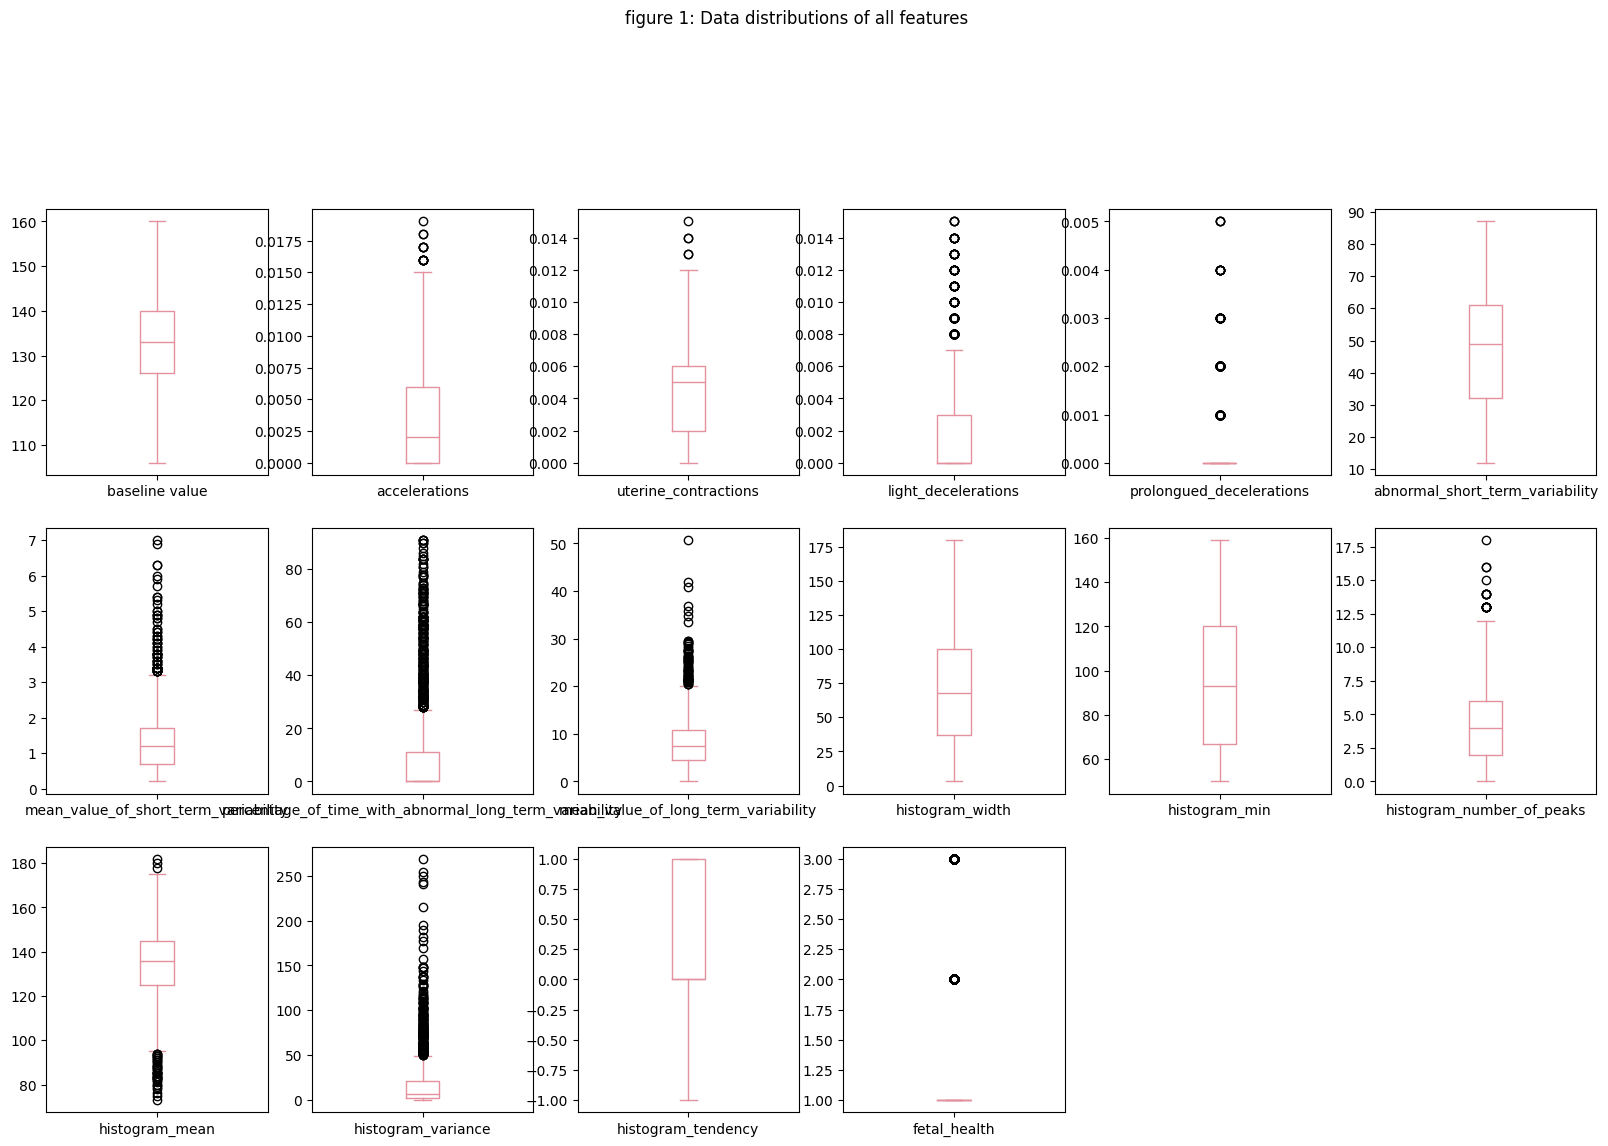

In [ ]:
# Menampilkan Boxplot untuk melihat adanya Outlayer
dfClean.plot(kind='box',subplots=True,layout=(5,6), sharex=False, color='#e3919e', figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

In [ ]:
# Menampilkan deskripsi data yang sudah dibersihkan
dfClean.describe()

,baseline value,accelerations,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_number_of_peaks,histogram_mean,histogram_variance,histogram_tendency,fetal_health
count,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000
mean,133.297732,0.003185,0.004451,0.001898,0.000143,46.990076,1.334688,9.789698,8.176465,70.541115,93.533081,4.076560,134.594045,17.894612,0.287335,1.303403
std,9.836018,0.003870,0.002803,0.002964,0.000565,17.178672,0.884025,18.299859,5.632219,38.979084,29.553499,2.951106,15.604574,28.388836,0.587216,0.613179
min,106.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,0.000000,3.000000,50.000000,0.000000,73.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.002000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,67.000000,2.000000,125.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.005000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,68.000000,93.000000,4.000000,136.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.006000,0.003000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,120.000000,6.000000,145.000000,21.000000,1.000000,1.000000
max,160.000000,0.019000,0.015000,0.015000,0.005000,87.000000,7.000000,91.000000,50.700000,180.000000,159.000000,18.000000,182.000000,269.000000,1.000000,3.000000


In [ ]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2116 entries, 0 to 2125
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2116 non-null   float64
 1   accelerations                                           2116 non-null   float64
 2   uterine_contractions                                    2116 non-null   float64
 3   light_decelerations                                     2116 non-null   float64
 4   prolongued_decelerations                                2116 non-null   float64
 5   abnormal_short_term_variability                         2116 non-null   float64
 6   mean_value_of_short_term_variability                    2116 non-null   float64
 7   percentage_of_time_with_abnormal_long_term_variability  2116 non-null   float64
 8   mean_value_of_long_term_variability        

In [ ]:
dfClean

,baseline value,accelerations,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_number_of_peaks,histogram_mean,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.0,73.0,0.5,43.0,2.4,64.0,62.0,2.0,137.0,73.0,1.0,2.0
1,132.0,0.006,0.006,0.003,0.0,17.0,2.1,0.0,10.4,130.0,68.0,6.0,136.0,12.0,0.0,1.0
2,133.0,0.003,0.008,0.003,0.0,16.0,2.1,0.0,13.4,130.0,68.0,5.0,135.0,13.0,0.0,1.0
3,134.0,0.003,0.008,0.003,0.0,16.0,2.4,0.0,23.0,117.0,53.0,11.0,134.0,13.0,1.0,1.0
4,132.0,0.007,0.008,0.000,0.0,16.0,2.4,0.0,19.9,117.0,53.0,9.0,136.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.007,0.000,0.0,79.0,0.2,25.0,7.2,40.0,137.0,4.0,150.0,2.0,0.0,2.0
2122,140.0,0.001,0.007,0.000,0.0,78.0,0.4,22.0,7.1,66.0,103.0,6.0,148.0,3.0,1.0,2.0
2123,140.0,0.001,0.007,0.000,0.0,79.0,0.4,20.0,6.1,67.0,103.0,5.0,148.0,4.0,1.0,2.0
2124,140.0,0.001,0.006,0.000,0.0,78.0,0.4,27.0,7.0,66.0,103.0,6.0,147.0,4.0,1.0,2.0


## 7) Menentukan Label Data <a class="anchor" id="h7"></a>

In [ ]:
from sklearn.model_selection import train_test_split

X_norm= dfClean.drop("fetal_health",axis=1).values
y = dfClean['fetal_health']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Sesuaikan nilai target sehingga dimulai dari 0
y_train = y_train - 1
y_test = y_test - 1

## 8) Membangun Model <a class="anchor" id="h8"></a>

## 9) Mengevaluasi Hasil Pemodelan <a class="anchor" id="h9"></a>

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



DecisionTree - Metrics:
Accuracy: 0.9087
Precision: 0.9089
Recall: 0.9087
F1 Score: 0.9088
ROC AUC: 0.8856


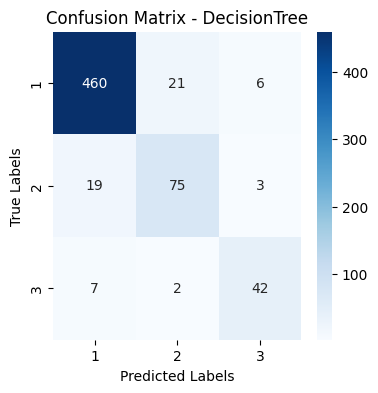


Classification Report for DecisionTree:

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       487
           1       0.77      0.77      0.77        97
           2       0.82      0.82      0.82        51

    accuracy                           0.91       635
   macro avg       0.85      0.85      0.85       635
weighted avg       0.91      0.91      0.91       635




RandomForest - Metrics:
Accuracy: 0.9370
Precision: 0.9354
Recall: 0.9370
F1 Score: 0.9340
ROC AUC: 0.9866


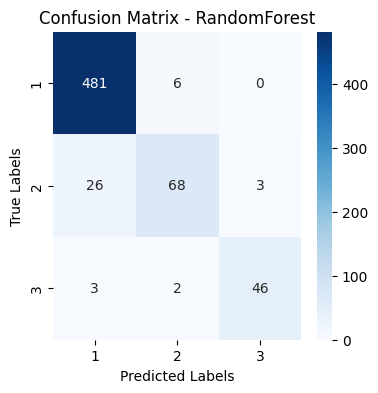


Classification Report for RandomForest:

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       487
           1       0.89      0.70      0.79        97
           2       0.94      0.90      0.92        51

    accuracy                           0.94       635
   macro avg       0.93      0.86      0.89       635
weighted avg       0.94      0.94      0.93       635




SVM - Metrics:
Accuracy: 0.8772
Precision: 0.8690
Recall: 0.8772
F1 Score: 0.8694
ROC AUC: 0.9571


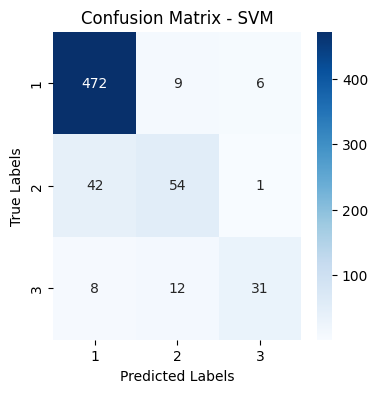


Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       487
           1       0.72      0.56      0.63        97
           2       0.82      0.61      0.70        51

    accuracy                           0.88       635
   macro avg       0.81      0.71      0.75       635
weighted avg       0.87      0.88      0.87       635




KNN - Metrics:
Accuracy: 0.8976
Precision: 0.8925
Recall: 0.8976
F1 Score: 0.8919
ROC AUC: 0.9362


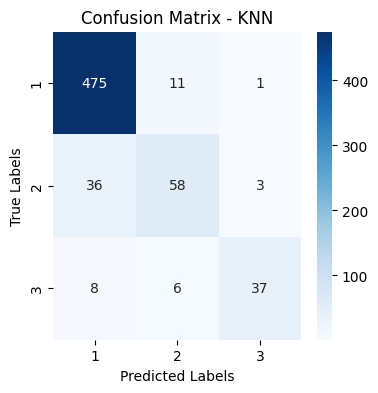


Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.92      0.98      0.94       487
           1       0.77      0.60      0.67        97
           2       0.90      0.73      0.80        51

    accuracy                           0.90       635
   macro avg       0.86      0.77      0.81       635
weighted avg       0.89      0.90      0.89       635




LogisticRegression - Metrics:
Accuracy: 0.8772
Precision: 0.8687
Recall: 0.8772
F1 Score: 0.8681
ROC AUC: 0.9579


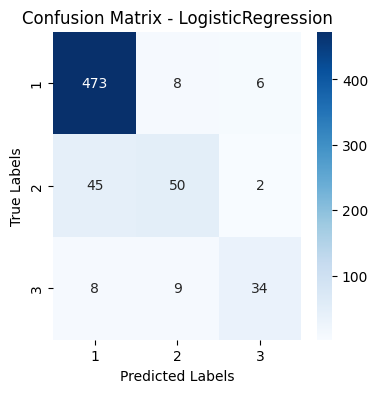


Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       487
           1       0.75      0.52      0.61        97
           2       0.81      0.67      0.73        51

    accuracy                           0.88       635
   macro avg       0.82      0.72      0.76       635
weighted avg       0.87      0.88      0.87       635




NaiveBayes - Metrics:
Accuracy: 0.8362
Precision: 0.8720
Recall: 0.8362
F1 Score: 0.8469
ROC AUC: 0.9266


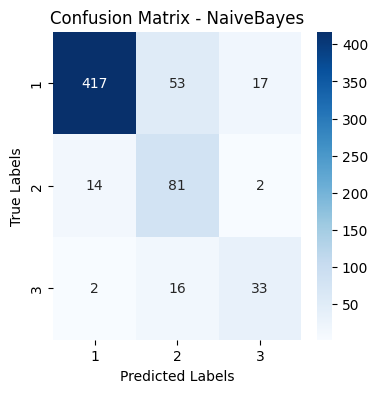


Classification Report for NaiveBayes:

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       487
           1       0.54      0.84      0.66        97
           2       0.63      0.65      0.64        51

    accuracy                           0.84       635
   macro avg       0.71      0.78      0.73       635
weighted avg       0.87      0.84      0.85       635




AdaBoost - Metrics:
Accuracy: 0.9118
Precision: 0.9109
Recall: 0.9118
F1 Score: 0.9071
ROC AUC: 0.9411


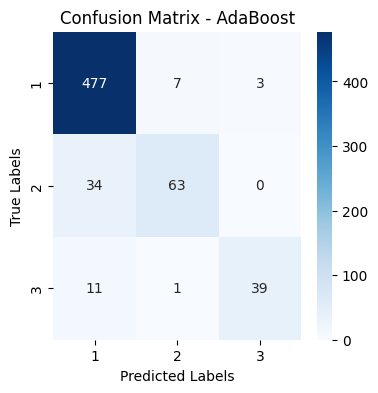


Classification Report for AdaBoost:

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       487
           1       0.89      0.65      0.75        97
           2       0.93      0.76      0.84        51

    accuracy                           0.91       635
   macro avg       0.91      0.80      0.84       635
weighted avg       0.91      0.91      0.91       635




GradientBoosting - Metrics:
Accuracy: 0.9417
Precision: 0.9413
Recall: 0.9417
F1 Score: 0.9408
ROC AUC: 0.9841


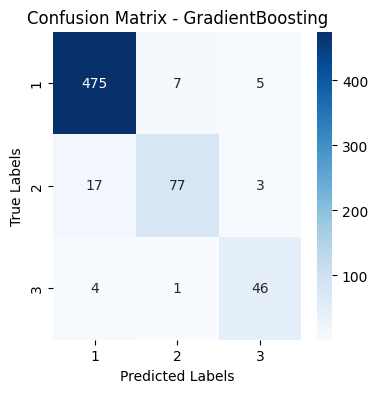


Classification Report for GradientBoosting:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       487
           1       0.91      0.79      0.85        97
           2       0.85      0.90      0.88        51

    accuracy                           0.94       635
   macro avg       0.91      0.89      0.90       635
weighted avg       0.94      0.94      0.94       635



Model performance:
DecisionTree: Accuracy = 0.9087, ROC AUC = 0.8856
RandomForest: Accuracy = 0.9370, ROC AUC = 0.9866
SVM: Accuracy = 0.8772, ROC AUC = 0.9571
KNN: Accuracy = 0.8976, ROC AUC = 0.9362
LogisticRegression: Accuracy = 0.8772, ROC AUC = 0.9579
NaiveBayes: Accuracy = 0.8362, ROC AUC = 0.9266
AdaBoost: Accuracy = 0.9118, ROC AUC = 0.9411
GradientBoosting: Accuracy = 0.9417, ROC AUC = 0.9841


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.metrics import precision_score, recall_score, f1_score


models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear', probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'LogisticRegression': LogisticRegression(max_iter=200),
    'NaiveBayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

def train_models(X_train, y_train, X_test, y_test):
    results = {}

    for model_name, model in models.items():

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)

        # Accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Precision, Recall, F1-score
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Calculate ROC AUC
        lb = LabelBinarizer()
        lb.fit(y_train)
        y_test_bin = lb.transform(y_test)
        roc_auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr')

        results[model_name] = {
            "accuracy": accuracy,
            "roc_auc": roc_auc,
            "model": model
        }

        # Output
        print(f"\n{model_name} - Metrics:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")

        cm = confusion_matrix(y_test, y_pred)

        # Plot Confusion Matrix
        plt.figure(figsize=(4, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
        plt.title(f"Confusion Matrix - {model_name}")
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

        # Classification Report
        print(f"\nClassification Report for {model_name}:\n")
        print(classification_report(y_test, y_pred))
        print("\n")

    return results

# Example usage:
results = train_models(X_train_scaled, y_train, X_test_scaled, y_test)

# Menampilkan Model Perfomance
print("Model performance:")
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['accuracy']:.4f}, ROC AUC = {metrics['roc_auc']:.4f}")


<ipython-input-40-96d2377e9ebd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_values, palette="rocket")


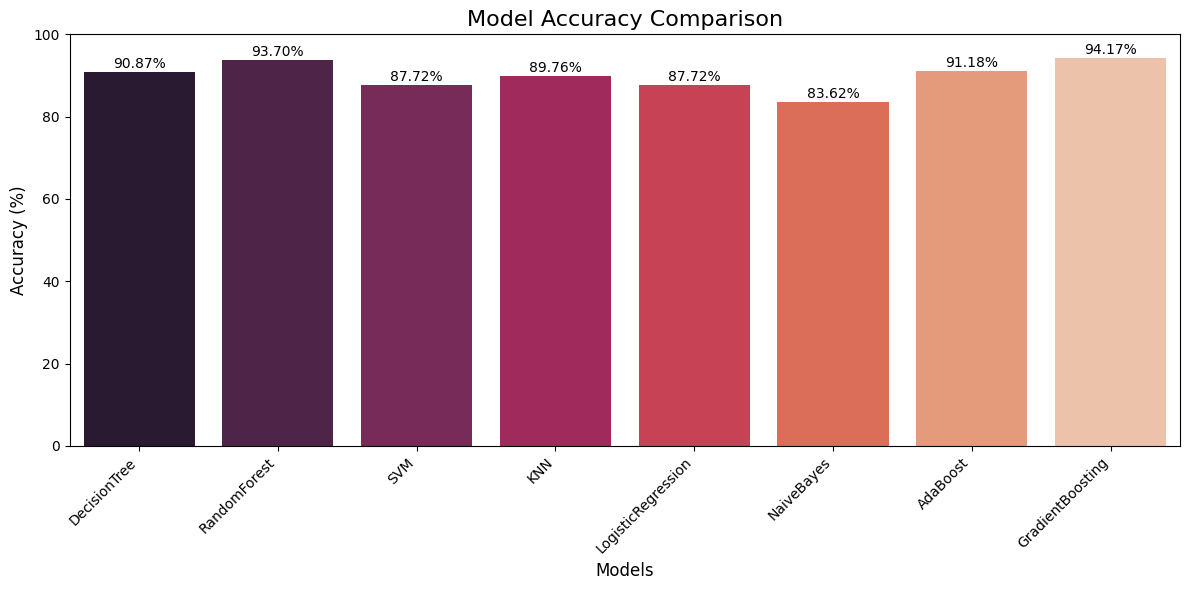

In [ ]:
# Ekstrak nama model dan nilai akurasi
model_names = list(results.keys())
accuracy_values = [metrics["accuracy"] * 100 for metrics in results.values()]  # Convert to percentages

# Membuat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=accuracy_values, palette="rocket")

# Menambahkan labels and title
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.ylim(0, 100)  # Set y-axis limit to show percentages properly

# Menambahkan accuracy values di atas bar
for i, acc in enumerate(accuracy_values):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

**Analisis**
Dari grafik tersebut, terlihat perbandingan akurasi dari beberapa model. Berikut adalah analisis berdasarkan grafik tersebut:

* **Model GradientBoosting** memiliki akurasi tertinggi sebesar 94.17%, sehingga dapat dianggap sebagai model terbaik untuk kasus ini dalam hal akurasi. Ini menunjukkan bahwa GradientBoosting mampu menangkap pola data dengan lebih baik dibanding model lainnya.
* **RandomForest** juga memiliki performa yang baik dengan akurasi sebesar 93.70%, mendekati GradientBoosting. Hal ini menunjukkan bahwa ensemble methods (seperti GradientBoosting dan RandomForest) sangat efektif untuk dataset ini.

* **DecisionTree** memiliki akurasi sebesar 90.87%, cukup baik, namun masih di bawah GradientBoosting dan RandomForest. Kemungkinan model ini mengalami overfitting karena cenderung mempelajari dataset terlalu spesifik.

* **AdaBoost** berada di urutan ketiga dengan akurasi 91.18%, menunjukkan bahwa boosting methods secara umum cocok untuk dataset ini.

* **KNN** (87.72%) dan **Logistic Regression** (89.76%) memiliki akurasi yang lebih rendah dibanding ensemble models. Ini bisa jadi karena dataset memiliki fitur yang lebih kompleks dan non-linear, yang tidak dapat sepenuhnya ditangkap oleh model sederhana seperti Logistic Regression atau algoritma berbasis jarak seperti KNN.

* **Naive Bayes** (83.62%) memiliki akurasi terendah di antara semua model yang dibandingkan. Hal ini mungkin terjadi karena asumsi independensi antar fitur dalam Naive Bayes tidak sesuai dengan karakteristik dataset.

## 10) Optimasi Model Klasifikasi <a class="anchor" id="h10"></a>


Best Model :

Confusion Matrix for Best Model: GradientBoosting (Accuracy: 0.9417)


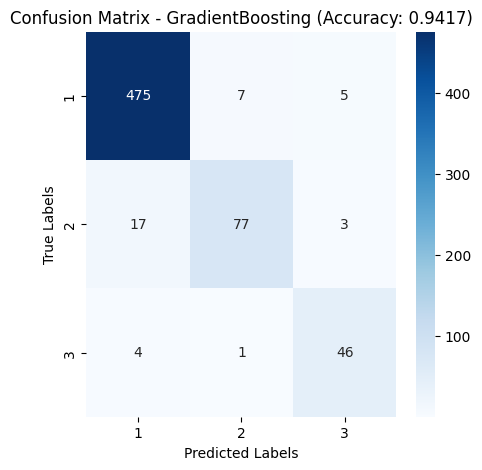

In [ ]:
print("\nBest Model :")
# Memilih model dengan akurasi tertinggi
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']  # Model terbaik
best_model_accuracy = results[best_model_name]['accuracy']

# Menampilkan confusion matrix untuk model terbaik
print(f"\nConfusion Matrix for Best Model: {best_model_name} (Accuracy: {best_model_accuracy:.4f})")

# Menggunakan model terbaik untuk prediksi
y_pred_best = best_model.predict(X_test_scaled)

# Membuat confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# Visualisasi confusion matrix untuk model terbaik
plt.figure(figsize=(5, 5))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title(f"Confusion Matrix - {best_model_name} (Accuracy: {best_model_accuracy:.4f})")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
columns_to_drop = ['fetal_health']
X_selected= dfClean.drop(columns_to_drop, axis=1).values
y = dfClean['fetal_health']

In [ ]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [ ]:
selected_classifier_gbc = GradientBoostingClassifier(random_state=42)
selected_classifier_gbc.fit(X_train_selected, y_train_selected)


GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_gbc_selected = selected_classifier_gbc.predict(X_test_selected)

# Evaluasi Model
print("\nGradient Boosting Classifier Model:")
accuracy_gbc_selected = round(accuracy_score(y_test_selected, y_pred_gbc_selected),3)
print("Accuracy:",accuracy_gbc_selected)
print("Classification Report:")
print(classification_report(y_test_selected, y_pred_gbc_selected))


Gradient Boosting Classifier Model:
Accuracy: 0.942
Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       487
         2.0       0.91      0.79      0.85        97
         3.0       0.85      0.90      0.88        51

    accuracy                           0.94       635
   macro avg       0.91      0.89      0.90       635
weighted avg       0.94      0.94      0.94       635



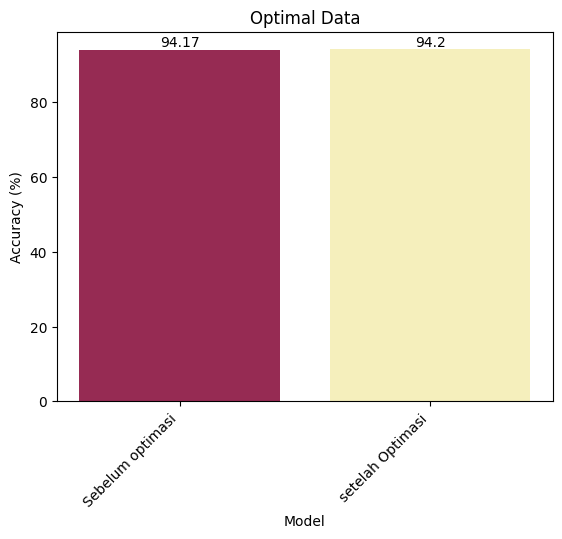

In [ ]:
model_comp = pd.DataFrame({'Model': ['Sebelum optimasi','setelah Optimasi'], 'Accuracy': [best_model_accuracy*100,
                    accuracy_rf_selected*100]})

# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp['Model'], model_comp['Accuracy'], color=['#962b53', '#f5efbc'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Optimal Data')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

**Analisis**

Berdasarkan grafik diatas, terlihat perbandingan akurasi model GradientBoosting sebelum dan setelah dilakukan optimasi. Sebelum optimasi, akurasi model berada pada 94.17%, sedangkan setelah optimasi, akurasi meningkat menjadi 94.20%.Optimasi model berhasil meningkatkan akurasi meskipun peningkatannya sangat kecil (0.03%). Hal ini menunjukkan bahwa model GradientBoosting pada dataset ini sudah cukup optimal.

# KESIMPULAN

Penerapan GradientBoosting dalam prediksi kesehatan janin dapat memberikan hasil yang andal untuk mendeteksi kondisi janin karena model ini mampu menangkap pola kompleks dari berbagai fitur yang memengaruhi kesehatan janin, Dengan akurasi yang tinggi, model ini dapat membantu tenaga medis dalam mengidentifikasi kondisi janin, termasuk kondisi normal, risiko ringan, atau risiko serius, dengan tingkat kepercayaan yang tinggi.
Dengan demikian, GradientBoosting berpotensi menjadi alat yang sangat bermanfaat dalam meningkatkan kualitas perawatan kesehatan janin, memberikan deteksi dini yang lebih baik, dan mendukung tenaga medis dalam menyediakan intervensi yang tepat waktu untuk memastikan kesehatan janin dan ibu tetap terjaga.